# 1. What are the active reports?

In [1]:
import os
import pandas as pd
from datetime import datetime, date

In [2]:
os.listdir("data/Salesforce/Objects")

['ReportEvent_50k_Sample.csv',
 'DataLoad_Exception_Log__c_5k_sample.csv',
 'EventLogFile_all_sample.csv',
 'Report_all_sample.csv',
 'ExceptionLogger__c_5k_sample.csv',
 'EventDefinition_1k_samples.csv',
 'FieldDefinition_all_sample.csv']

## Loading reports

In [3]:
reports = pd.read_csv("data/Salesforce/Objects/Report_all_sample.csv")

In [4]:
reports.shape

(17397, 18)

In [5]:
list(reports.columns)

['CreatedById',
 'CreatedDate',
 'Description',
 'DeveloperName',
 'FolderName',
 'Format',
 'Id',
 'IsDeleted',
 'LastModifiedById',
 'LastModifiedDate',
 'LastReferencedDate',
 'LastRunDate',
 'LastViewedDate',
 'Name',
 'NamespacePrefix',
 'OwnerId',
 'ReportTypeApiName',
 'SystemModstamp']

In [6]:
reports.head()

,CreatedById,CreatedDate,Description,DeveloperName,FolderName,Format,Id,IsDeleted,LastModifiedById,LastModifiedDate,LastReferencedDate,LastRunDate,LastViewedDate,Name,NamespacePrefix,OwnerId,ReportTypeApiName,SystemModstamp
0,0050b000004MLGeAAO,2018-06-20T19:28:03.000Z,NaN,Email2Case_KPI_Wp9,Public Reports,Summary,00O0b000004kSKkEAM,False,0050b000004MLGeAAO,2019-10-16T03:00:16.000Z,2022-06-20T02:04:59.000Z,2022-06-20T02:04:59.000Z,2022-06-20T02:04:59.000Z,Email2Case KPI,NaN,00D0b000000GaMpEAK,CaseList@Case.MaritzCX__Survey_Response_Id__c,2022-06-20T02:04:59.000Z
1,0050b000004KRSoAAO,2021-08-18T13:14:25.000Z,NaN,Milestone_Report_by_Pallavi_Reddy,Public Reports,Summary,00O2R000003JUgNUAW,False,0050b000004KRSoAAO,2021-08-19T07:27:05.000Z,2022-06-19T18:20:34.000Z,2022-04-18T05:30:14.000Z,2022-06-19T18:20:34.000Z,APJ RDC PM Team - Milestone Report,NaN,00D0b000000GaMpEAK,Project_with_Order_Milestone_Product__c,2022-04-18T05:30:14.000Z
2,0050b000004KRSoAAO,2021-08-18T14:53:32.000Z,NaN,APJ_RDC_PM_Current_Quarter_Milestones,Public Reports,Summary,00O2R000003JUh6UAG,False,0050b000004KRSoAAO,2021-08-19T07:08:48.000Z,NaN,2022-05-25T08:03:16.000Z,NaN,APJ RDC PM - Current Quarter Milestones,NaN,00D0b000000GaMpEAK,Project_with_Order_Milestone_Product__c,2022-05-25T08:03:16.000Z
3,0050b000004KVKcAAO,2021-05-06T17:43:54.000Z,Show QTD Earned Revenue - Milestones that have...,C_C_QTD_Earned_Revenue1,Public Reports,Summary,00O2R000003s1qaUAA,False,0050b000004KVKcAAO,2021-08-09T21:37:07.000Z,2022-06-19T18:20:37.000Z,2022-06-15T20:56:37.000Z,2022-06-19T18:20:37.000Z,C&C - QTD Earned Revenue,NaN,00D0b000000GaMpEAK,NaN,2022-06-15T20:56:37.000Z
4,0052R000009nJKyQAM,2020-08-06T07:00:50.000Z,NaN,Germany_Swivel_Projects_2,Public Reports,Tabular,00O2R000003rzEdUAI,False,0050b000004KUjyAAG,2020-09-01T13:03:59.000Z,NaN,2021-10-28T19:18:37.000Z,NaN,Germany Swivel Projects CFQ,NaN,00D0b000000GaMpEAK,NaN,2021-10-28T19:18:37.000Z


In [7]:
reports = reports.dropna(subset=['LastRunDate'])

In [8]:
reports.shape

(17235, 18)

# Sorting by LastRunDate

In [9]:
sortedByLastRunDate = reports.sort_values('LastRunDate', ascending=False)

Let's define a reference date and a time window to consider active reports.

- The reference date may be the most recent date in our sample.
- Let's consider a range of 180 in this analysis.

Since the reports are sorted by `LastRunDate`, our reference date is the first row of the dataframe.

In [10]:
sortedByLastRunDate['LastRunDate'].iloc[0]

'2022-06-20T02:07:25.000Z'

Remove training 'Z' without loss of useful information. (according to this [reference](https://social.msdn.microsoft.com/Forums/en-US/27c2f2a9-8a77-4a11-9f71-5e56ddbf064b/what-is-z-in-date-time-format-yyyymmddthhmmssz?forum=csharpgeneral))

In [11]:
sortedByLastRunDate['LastRunDate'].iloc[0][:-1]

'2022-06-20T02:07:25.000'

In [12]:
dateStr = sortedByLastRunDate['LastRunDate'].iloc[0][:-1]
referenceDate = datetime.fromisoformat(dateStr).date()

In [13]:
referenceDate

datetime.date(2022, 6, 20)

Let's filter all reports that were run at least 180 days from this date.

In [14]:
elapsed_days = 180

Writing a function to filter active reports.

In [15]:
def filterActiveReports(lastRunDate):
    dateStr = lastRunDate[:-1] # removing trailing 'Z'
    timedelta = referenceDate - datetime.fromisoformat(dateStr).date()
    return timedelta.days <= elapsed_days

Creating a column to distinguish active and inactive reports.

In [16]:
reports['isActive'] = reports['LastRunDate'].apply(filterActiveReports)

In [17]:
reports['isActive'].value_counts()

True     11605
False     5630
Name: isActive, dtype: int64

<AxesSubplot:>

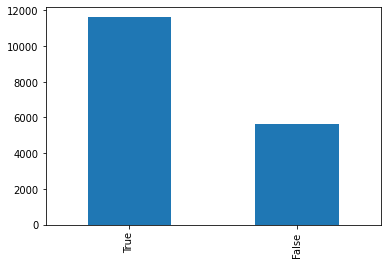

In [18]:
# a plot example
reports['isActive'].value_counts().plot(kind='bar')

In [19]:
activeReports = reports[reports['isActive']]

In [20]:
activeReports.shape

(11605, 19)

Storing a dataset with only active reports.

In [21]:
activeReports.to_csv("./datasets/active_reports_180.csv", index=False)

## Load events_reports table

In [22]:
reports_event = pd.read_csv("data/Salesforce/Objects/ReportEvent_50k_Sample.csv", low_memory=False)

In [23]:
list(reports_event.columns)

['ColumnHeaders',
 'CreatedDate',
 'DashboardId',
 'DashboardName',
 'Description',
 'DisplayedFieldEntities',
 'EvaluationTime',
 'EventDate',
 'EventIdentifier',
 'EventSource',
 'ExecutionIdentifier',
 'ExportFileFormat',
 'Format',
 'GroupedColumnHeaders',
 'Id',
 'IsScheduled',
 'LoginHistoryId',
 'LoginKey',
 'Name',
 'NumberOfColumns',
 'Operation',
 'OwnerId',
 'PolicyOutcome',
 'QueriedEntities',
 'Records',
 'RelatedEventIdentifier',
 'ReportId',
 'RowsProcessed',
 'Scope',
 'Sequence',
 'SessionKey',
 'SessionLevel',
 'SourceIp',
 'UserId',
 'Username']

In [24]:
reports_event.head()

,ColumnHeaders,CreatedDate,DashboardId,DashboardName,Description,DisplayedFieldEntities,EvaluationTime,EventDate,EventIdentifier,EventSource,...,RelatedEventIdentifier,ReportId,RowsProcessed,Scope,Sequence,SessionKey,SessionLevel,SourceIp,UserId,Username
0,"[UserServicePresence.StatusStartDate, UserServ...",2022-06-01T13:10:40.563Z,NaN,NaN,NaN,"User,UserServicePresence,ServicePresenceStatus",0.0,2022-06-01T13:10:39.103Z,1d6ab64e-3037-4b55-adde-aa201e6c837a,Classic,...,NaN,00O0b000004kkZKEAY,0.0,organization,1,NaN,NaN,NaN,0050b0000046hqjAAA,mayank.kaushal@dell.com.dellservices
1,"[UserServicePresence.StatusStartDate, UserServ...",2022-05-26T12:48:49.891Z,NaN,NaN,NaN,"User,UserServicePresence,ServicePresenceStatus",0.0,2022-05-26T12:48:48.928Z,2da2bd62-c797-4dfd-ae59-e780e49637a1,Classic,...,NaN,00O0b000004kkZKEAY,0.0,organization,1,NaN,NaN,NaN,0050b0000046hqjAAA,mayank.kaushal@dell.com.dellservices
2,"[UserServicePresence.StatusStartDate, UserServ...",2022-05-25T13:22:26.467Z,NaN,NaN,NaN,"User,UserServicePresence,ServicePresenceStatus",0.0,2022-05-25T13:22:18.205Z,4c39d2ef-bd8d-4e38-8183-f41222e150b1,Classic,...,NaN,00O0b000004kkZKEAY,0.0,organization,1,NaN,NaN,NaN,0050b0000046hqjAAA,mayank.kaushal@dell.com.dellservices
3,"[Case.CaseNumber, Case.Subject, Case.Case_Age_...",2022-05-24T12:51:48.336Z,NaN,NaN,NaN,"Activity,Case",0.0,2022-05-24T12:51:41.742Z,537421ae-517f-473d-820d-50823f0f26b2,Classic,...,NaN,00O0b000004kTazEAE,4.0,user,1,NaN,NaN,NaN,0050b0000046hqjAAA,mayank.kaushal@dell.com.dellservices
4,"[CASE_NUMBER, SUBJECT, EMAIL.MESSAGE_DATE, EMA...",2022-05-24T12:51:50.365Z,NaN,NaN,What are the incoming emails on cases that I'm...,"EmailMessage,Case",0.0,2022-05-24T12:51:41.593Z,c97f1d48-374f-4f2b-a673-8120a42b65b9,Classic,...,NaN,00O0b000004kpcxEAA,0.0,user,1,NaN,NaN,NaN,0050b0000046hqjAAA,mayank.kaushal@dell.com.dellservices


In [25]:
reports_event.shape

(50000, 35)

### Let's apply some to check the reports_events that are active

 Filtering lightning reports from reports_event (According this [documatation](https://developer.salesforce.com/docs/atlas.en-us.236.0.platform_events.meta/platform_events/sforce_api_objects_reportevent.htm))

In [26]:
lightning_reports = reports_event[(reports_event['EventSource'] == 'Lightning')]

Sorted values by EventDate (According this [documatation](https://developer.salesforce.com/docs/atlas.en-us.236.0.platform_events.meta/platform_events/sforce_api_objects_reportevent.htm))

In [27]:
sortedByEventDate = lightning_reports.sort_values('EventDate', ascending=False)

Let's go over a new reference date and a time window to consider active reports.

- The reference date may be the most recent date in our sample.
- Considering a range of 30 in this analysis.

As the reports are sorted by EventDate, our reference date is the first row of the dataframe.


In [28]:
dateStr = sortedByEventDate['EventDate'].iloc[0][:-1] # Removing trelling 'Z'
dateStr

'2022-06-19T21:38:10.334'

Filtering all reports that were edited/run in the last 30 days

In [29]:
elapsedDays = 30

Creating a fuction to filter this actives reports

In [30]:
def filterActiveEventsReports(eventDate):
    dateStr = eventDate[:-1] # removing trailing 'Z'
    timedelta = referenceDate - datetime.fromisoformat(dateStr).date()
    return timedelta.days <= elapsedDays 

Creating a column for active reports at last month

In [31]:
lightning_reports['lastActiveMonth'] = lightning_reports['EventDate'].apply(filterActiveEventsReports)

/tmp/ipykernel_20431/4288702815.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lightning_reports['lastActiveMonth'] = lightning_reports['EventDate'].apply(filterActiveEventsReports)


In [32]:
lightning_reports['lastActiveMonth'].value_counts()

False    24920
True      5322
Name: lastActiveMonth, dtype: int64

<AxesSubplot:>

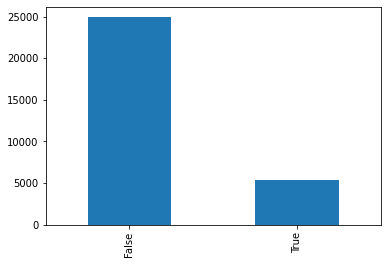

In [33]:
lightning_reports['lastActiveMonth'].value_counts().plot(kind='bar')

Checking if there was any update through the RowsProcessed column

In [34]:
lightning_reports.shape

(30242, 36)

In [35]:
active_reports_rowsProcessed = lightning_reports.loc[(reports_event['RowsProcessed'] > 0)]

In [36]:
active_reports_rowsProcessed.shape

(28534, 36)

 Grouping the table by UserId and SessionKey

In [37]:
columns = ['RowsProcessed', 'ReportId', 'Sequence', 'UserId', 'SessionKey'] 
lighitingGroups= active_reports_rowsProcessed.groupby(['UserId', 'SessionKey']).agg({'ReportId': 'count',
                                                                                    'RowsProcessed': 'sum',
                                                                                    'Sequence': 'count'}).reset_index()

In [38]:
lighitingGroups

,UserId,SessionKey,ReportId,RowsProcessed,Sequence
0,0050b0000046huMAAQ,/x8R+TSdPKm+Qdv3,10,73160.0,10
1,0050b0000046huMAAQ,1SYYBXzUmlF/tWnA,5,51455.0,5
2,0050b0000046huMAAQ,1cWFIMsETtLrXM6o,4,501.0,4
3,0050b0000046huMAAQ,4DKiOqb1R+Pdzuav,6,339.0,6
4,0050b0000046huMAAQ,7bPknSOYOH71Bbj9,12,113826.0,12
...,...,...,...,...,...
1503,0050b000004K0zFAAS,r377uI140lvTplnF,6,1030.0,6
1504,0050b000004K0zFAAS,sD+efawoH3Ci4Qit,46,8412.0,46
1505,0050b000004K0zFAAS,t307Y2atZ3jKDv7u,73,61697.0,73
1506,0050b000004K0zFAAS,uCPHPkm1Mz/1T+F1,21,3816.0,21




After applying the filters, we can conclude that this 50k sample had changes. The most significant is to apply the Last Active Month report filter, where only 5322 active Lightning-type samples were found, approximately 11% of the sample space.

## Loading table Reports Event Type

In [39]:
reports_event_type = pd.read_csv("data/Salesforce/ELF/Report/2022-06-20_Report.csv")

In [40]:
list(reports_event_type.columns)

['EVENT_TYPE',
 'TIMESTAMP',
 'REQUEST_ID',
 'ORGANIZATION_ID',
 'USER_ID',
 'RUN_TIME',
 'CPU_TIME',
 'URI',
 'SESSION_KEY',
 'LOGIN_KEY',
 'USER_TYPE',
 'REQUEST_STATUS',
 'DB_TOTAL_TIME',
 'ENTITY_NAME',
 'DISPLAY_TYPE',
 'RENDERING_TYPE',
 'REPORT_ID',
 'ROW_COUNT',
 'NUMBER_EXCEPTION_FILTERS',
 'NUMBER_COLUMNS',
 'AVERAGE_ROW_SIZE',
 'SORT',
 'DB_BLOCKS',
 'DB_CPU_TIME',
 'NUMBER_BUCKETS',
 'TIMESTAMP_DERIVED',
 'USER_ID_DERIVED',
 'CLIENT_IP',
 'URI_ID_DERIVED',
 'REPORT_ID_DERIVED',
 'ORIGIN']

In [41]:
reports_event_type.shape

(705, 31)

### Let's apply some to check the reports that are active

Filtering reports event type ORIGIN per Lightning values( ```DashboardComponentPreviewed``` and ```ReportRunFromLightning```)

In [42]:
lightning_event_type = reports_event_type[(reports_event_type['ORIGIN'] == 'DashboardComponentPreviewed') | (reports_event_type['ORIGIN'] == 'ReportRunFromLightning')]

In [43]:
lightning_event_type.shape

(382, 31)

Sorted values by TIMESTAMP_DERIVED (Acording to this [Documatation](https://developer.salesforce.com/docs/atlas.en-us.238.0.object_reference.meta/object_reference/sforce_api_objects_eventlogfile_report.htm?q=report+type))

In [44]:
sortedByTimestampDerived = lightning_event_type.sort_values('TIMESTAMP_DERIVED', ascending=False)

Let's go over a new reference date and a time window to consider active reports.

- The reference date may be the most recent date in our sample.
- Considering a range of 30 in this analysis.

As the reports are sorted by TIMESTAMP_DERIVED, our reference date is the first row of the dataframe.


In [45]:
evetDateStr = sortedByTimestampDerived['TIMESTAMP_DERIVED'].iloc[0][:-1] # Removing trelling 'Z'
evetDateStr

'2022-06-20T00:59:52.239'

Using a varieble for filtering all reports that were run/edited in 30 days

In [46]:
elapsedDays

30

Using a function to filter this actives reports and creating a column for active reports

In [47]:
lightning_event_type['lastActiveMonth'] = lightning_event_type['TIMESTAMP_DERIVED'].apply(filterActiveEventsReports)

/tmp/ipykernel_20431/3207486056.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lightning_event_type['lastActiveMonth'] = lightning_event_type['TIMESTAMP_DERIVED'].apply(filterActiveEventsReports)


In [48]:
lightning_event_type['lastActiveMonth'].value_counts()

True    382
Name: lastActiveMonth, dtype: int64

A plot for example

<AxesSubplot:>

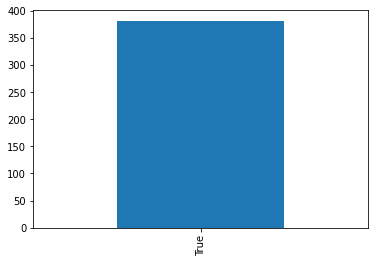

In [49]:
lightning_event_type['lastActiveMonth'].value_counts().plot(kind='bar')

Checking if there was any update through the ROW_COUNT column

In [50]:
active_event_reports_rowsProcessed = lightning_event_type.loc[(reports_event_type['ROW_COUNT'] > 0)]

In [51]:
active_event_reports_rowsProcessed.shape

(328, 32)

In [52]:
active_event_reports_rowsProcessed

,EVENT_TYPE,TIMESTAMP,REQUEST_ID,ORGANIZATION_ID,USER_ID,RUN_TIME,CPU_TIME,URI,SESSION_KEY,LOGIN_KEY,...,DB_BLOCKS,DB_CPU_TIME,NUMBER_BUCKETS,TIMESTAMP_DERIVED,USER_ID_DERIVED,CLIENT_IP,URI_ID_DERIVED,REPORT_ID_DERIVED,ORIGIN,lastActiveMonth
1,Report,2.022062e+13,TID:9360605190000141c8,00D0b000000GaMp,0056P0000011h1x,538,364,/aura,k0O17Cwh8elWHibW,DxBoCPZTU8z/526n,...,2439,40,0,2022-06-20T00:00:37.553Z,0056P0000011h1xQAA,40.119.243.144,NaN,00O0b000004kTazEAE,ReportRunFromLightning,True
2,Report,2.022062e+13,TID:43400500000b9a797a,00D0b000000GaMp,0052R000009TlEN,368,228,/aura,klFBItiUvLVTRT2V,ch/M1kjy4JkAycob,...,917,10,0,2022-06-20T00:01:04.965Z,0052R000009TlENQA0,163.244.182.17,NaN,00O0b000006iNwdEAE,ReportRunFromLightning,True
7,Report,2.022062e+13,TID:289831900005ce827a,00D0b000000GaMp,0050b000004K6Tw,535,327,/aura,106SrPi3x8ez47PF,sKCnFbDnwK9jv0jy,...,2845,60,0,2022-06-20T00:02:02.293Z,0050b000004K6TwAAK,203.174.168.50,NaN,00O0b000004kTazEAE,ReportRunFromLightning,True
8,Report,2.022062e+13,TID:526446900008f8d67f,00D0b000000GaMp,0050b000004K6Tw,499,399,/aura,106SrPi3x8ez47PF,sKCnFbDnwK9jv0jy,...,3361,20,0,2022-06-20T00:02:26.018Z,0050b000004K6TwAAK,203.174.168.50,NaN,00O0b000004kTazEAE,ReportRunFromLightning,True
11,Report,2.022062e+13,TID:17504290000f749582,00D0b000000GaMp,0052R00000ASQJO,624,336,/aura,/S9Y/NKReYa2UT7N,eS2uv/eC5lRQnCg7,...,3543,90,0,2022-06-20T00:03:39.772Z,0052R00000ASQJOQA5,163.244.182.12,NaN,00O0b000004kTazEAE,ReportRunFromLightning,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
690,Report,2.022062e+13,SLB:fe7972f2c81bad5511f94d34b0cd1843,00D0b000000GaMp,0050b000004K3eB,486,396,/aura,9YkqD4AubILkP3/t,E2TuHYqfPqQzwGBR,...,2570,40,0,2022-06-20T00:58:56.647Z,0050b000004K3eBAAS,132.237.180.16,NaN,00O0b000004kTazEAE,ReportRunFromLightning,True
694,Report,2.022062e+13,TID:2734184900000defe8,00D0b000000GaMp,0050b000004KVf6,325,251,/aura,xJBIetXY0p9O3YcY,KVZLlNP29f6AR2HG,...,634,30,0,2022-06-20T00:59:15.286Z,0050b000004KVf6AAG,168.159.160.201,NaN,00O2R000004EjYVUA0,ReportRunFromLightning,True
699,Report,2.022062e+13,TID:35496078900005a597,00D0b000000GaMp,0050b000005nqbo,3016,148,/aura,QrZXc46MGBs5cjD2,FlrwDoQN8TZ2wD2O,...,1030,30,0,2022-06-20T00:59:40.874Z,0050b000005nqboAAA,137.69.117.201,NaN,00O0b000004ApmnEAC,ReportRunFromLightning,True
700,Report,2.022062e+13,TID:928012500000897754,00D0b000000GaMp,0051P000003jYnQ,707,494,/aura,an+zT5DXHa2OVcr9,G8Wsd7SBoCYO+MG5,...,20212,40,0,2022-06-20T00:59:45.343Z,0051P000003jYnQQAU,163.244.246.207,NaN,00O2R000004BQ1bUAG,ReportRunFromLightning,True


After applying the filters, we can conclude that this small sample had few changes. The most significant is to apply the Lighitning source report filter. Taking into account that this sample is from the date 2022-06-20